<h2>Data Cleaning & Preprocessing</h2>

Importing of essential library for data manipulation

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

In [28]:
dataset = pd.read_csv('ASEC_individual.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163543 entries, 0 to 163542
Columns: 830 entries, PERIDNUM to YYYYMM
dtypes: float64(2), int64(827), object(1)
memory usage: 1.0+ GB


There are currently 830 columns and 163543 rows.
By reviewing the data dictionary, we understand that the data is split into 10 broad topics:
1. Record Identifiers
2. Weights
3. Demographics
4. Basic CPS Items
5. Work Experience
6. Income
7. Poverty
8. Health Insurance
9. Supplemental Poverty Measure
10. Migration

Given that we want to find out how one's background affect their salary, we will not be interested in the record identifiers, weight and other social issues and trends like poverty, health insurance, supplemental poverty measure and migration. We are also not concerned with work experience as it does not provide information on experience in their current job. We will only be interested in topics: Demographics, Basic CPS Items and Income.

Within those topics, there may also be columns we are not interested in.
For Demographics , it is split into 2 subtopics:
1. Individual Characteristics
2. Allocation Flags

We are only interested in the individual characteristics. From <b>individual characteristics</b>, we can find out:
1. Highest education attainment (A_HGA) -> Education
2. Marital status (A_MARITL) -> Marital
3. Gender (A_SEX) -> Sex
4. Age (AGE1) -> Age
5. Race (PRDTRACE) -> Race
6. Veteran status (PEAFEVER) -> Veteran
7. Possession of professional certificates (PECERT1) -> Pro_Cert
8. Possession of government certificates (PECERT2) -> Gov_Cert
9. Whether the certification is needed for their job (PECERT3) -> Cert_Need
10. Grooming disability (PEDISDRS) -> Groom_Dis
11. Hearing difficulty (PEDISEAR) -> Hear_Dis
12. Visual disability (PEDISEYE) -> Vis_Dis
13. Conditions affecting ability to run errands (PEDISOUT) -> Err_Dis
14. Difficulty climbing stairs (PEDISPHY) -> Climb_Dis
15. Difficulty concentrating (PEDISREM) -> Concen_Dis
16. Citizenship group (PRCITSHP) -> Citizenship

We can then create a list containing the relevant columns names for demographics

In [29]:
demographics = ['A_HGA', 'A_MARITL', 'A_SEX', 'AGE1', 'PRDTRACE', 'PEAFEVER', 'PECERT1', 'PECERT2', 'PECERT3', 'PEDISDRS', 'PEDISEAR', 'PEDISEYE', 'PEDISOUT', 'PEDISPHY', 'PEDISREM', 'PRCITSHP']

#new column names for demographics
demographics_new = ['Education', 'Marital', 'Sex', 'Age', 'Race', 'Veteran', 'Pro_Cert', 'Gov_Cert', 'Cert_Need', 'Groom_Dis', 'Hear_Dis', 'Vis_Dis', 'Err_Dis', 'Climb_Dis', 'Concen_Dis', 'Citizenship']


For <b>Basic CPS Items</b>, we can find out:
1. Hours worked per week (A_HRS) -> HrsWeek
2. Industry (A_MJIND) -> Industry
3. Occupation (PEIOOCC) -> Occupation
4. Class of work; private, government etc (PEIO1COW) -> WorkClass

For <b>Income</b>, we can find out:
1. Total wage and salary earnings (WSAL_VAL) -> Salary

We can then create a list containing the relevant columns names for Basic CPS, experience and income

In [30]:
basic_cps = ['A_HRS1', 'A_MJIND', 'PEIOOCC', 'PEIO1COW']
#experience = ['WELKNW']
income = ['WSAL_VAL']

#new column names for basic_cps and income
basic_cps_new = ['HrsWeek', 'Industry', 'Occupation', 'WorkClass']
#experience_new = ['JobSearchTime']
income_new = ['Salary']

<b>Therefore, the features we will be preliminary selecting are:</b>
<br>1. Highest education attainment (A_HGA) -> Education
<br>2. Marital status (A_MARITL) -> Marital
<br>3. Gender (A_SEX) -> Sex
<br>4. Age (AGE1) -> Age
<br>5. Race (PRDTRACE) -> Race
<br>6. Veteran status (PEAFEVER) -> Veteran
<br>7. Possession of professional certificates (PECERT1) -> Pro_Cert
<br>8. Possession of government certificates (PECERT2) -> Gov_Cert
<br>9. Whether the certification is needed for their job (PECERT3) -> Cert_Need
<br>10. Grooming disability (PEDISDRS) -> Groom_Dis
<br>11. Hearing difficulty (PEDISEAR) -> Hear_Dis
<br>12. Visual disability (PEDISEYE) -> Vis_Dis
<br>13. Conditions affecting ability to run errands (PEDISOUT) -> Err_Dis
<br>14. Difficulty climbing stairs (PEDISPHY) -> Climb_Dis
<br>15. Difficulty concentrating (PEDISREM) -> Concen_Dis
<br>16. Citizenship group (PRCITSHP) -> Citizenship
<br>17. Hours worked per week (A_HRS) -> HrsWeek
<br>18. Industry (A_MJIND) -> Industry
<br>19. Occupation (PEIOOCC) -> Occupation
<br>20. Class of work; private, government etc (PEIO1COW) -> WorkClass
<br>22. Total wage and salary earnings (WSAL_VAL) -> Salary

In [31]:
#create new dataset
new_data = pd.DataFrame()
new_cols = [demographics_new, basic_cps_new, income_new]

n = 0
for lst in [demographics, basic_cps, income]:
    new_lst = new_cols[n]
    n += 1
    for i in range(len(lst)):
        new_data[new_lst[i]] = dataset[lst[i]]
new_data

,Education,Marital,Sex,Age,Race,Veteran,Pro_Cert,Gov_Cert,Cert_Need,Groom_Dis,...,Vis_Dis,Err_Dis,Climb_Dis,Concen_Dis,Citizenship,HrsWeek,Industry,Occupation,WorkClass,Salary
0,39,1,2,12,1,2,2,-1,-1,1,...,2,1,1,1,1,0,0,-1,0,0
1,39,1,1,12,1,2,2,-1,-1,2,...,2,2,2,2,1,0,3,6305,4,10000
2,39,4,2,17,1,2,2,-1,-1,2,...,1,2,2,2,1,0,0,-1,0,0
3,43,1,2,15,1,2,2,-1,-1,2,...,2,2,2,2,1,32,10,2002,5,43000
4,39,1,1,15,1,2,1,1,1,2,...,2,2,2,2,1,40,6,9130,4,33000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163538,39,7,1,15,4,2,1,1,-1,2,...,2,2,1,2,1,0,0,-1,0,0
163539,39,1,1,16,4,2,2,-1,-1,2,...,2,2,2,2,4,0,0,-1,0,0
163540,39,1,2,15,4,2,2,-1,-1,2,...,2,2,2,2,4,40,11,4230,4,35000
163541,40,1,1,12,1,2,2,-1,-1,2,...,2,2,2,2,1,0,0,-1,0,0


In [32]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163543 entries, 0 to 163542
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Education    163543 non-null  int64
 1   Marital      163543 non-null  int64
 2   Sex          163543 non-null  int64
 3   Age          163543 non-null  int64
 4   Race         163543 non-null  int64
 5   Veteran      163543 non-null  int64
 6   Pro_Cert     163543 non-null  int64
 7   Gov_Cert     163543 non-null  int64
 8   Cert_Need    163543 non-null  int64
 9   Groom_Dis    163543 non-null  int64
 10  Hear_Dis     163543 non-null  int64
 11  Vis_Dis      163543 non-null  int64
 12  Err_Dis      163543 non-null  int64
 13  Climb_Dis    163543 non-null  int64
 14  Concen_Dis   163543 non-null  int64
 15  Citizenship  163543 non-null  int64
 16  HrsWeek      163543 non-null  int64
 17  Industry     163543 non-null  int64
 18  Occupation   163543 non-null  int64
 19  WorkClass    163543 non

<b>Reduce the dataset size by only including those who are working (ie salary > 0) and excluding the top 5% ($342987) to reduce skewing of our data due to the rising income inequality</b>

In [33]:
new_data = new_data[(new_data['Salary'] > 0) & (new_data['Salary'] < 342987)]

<b>Checking for missing entries</b>

In [34]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76211 entries, 1 to 163542
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Education    76211 non-null  int64
 1   Marital      76211 non-null  int64
 2   Sex          76211 non-null  int64
 3   Age          76211 non-null  int64
 4   Race         76211 non-null  int64
 5   Veteran      76211 non-null  int64
 6   Pro_Cert     76211 non-null  int64
 7   Gov_Cert     76211 non-null  int64
 8   Cert_Need    76211 non-null  int64
 9   Groom_Dis    76211 non-null  int64
 10  Hear_Dis     76211 non-null  int64
 11  Vis_Dis      76211 non-null  int64
 12  Err_Dis      76211 non-null  int64
 13  Climb_Dis    76211 non-null  int64
 14  Concen_Dis   76211 non-null  int64
 15  Citizenship  76211 non-null  int64
 16  HrsWeek      76211 non-null  int64
 17  Industry     76211 non-null  int64
 18  Occupation   76211 non-null  int64
 19  WorkClass    76211 non-null  int64
 20  Salar

Hence, we found that there are no missing entries for every row

<b>Checking for invalid entries</b>

According to the data dictionary provided, these columns have values to denote 'Not in Universe' (ie this question is not targeted at them):
<br>Age: 0
<br>Veteran: -1
<br>Pro_Cert: -1
<br>Gov_Cert: -1
<br>Cert_Need: -1
<br>Groom_Dis: -1
<br>Vis_Dis: -1
<br>Err_Dis: -1
<br>Climb_Dis: -1
<br>Concen_Dis: -1
<br>HrsWeek: -1
<br>Industry: 0
<br>Occupation: -1
<br>WorkClass: 0

In [35]:
#store names of columns that possibly have invalid input
col_lst = ['Age','Veteran','Pro_Cert','Gov_Cert','Cert_Need','Groom_Dis','Vis_Dis','Err_Dis','Climb_Dis','Concen_Dis','HrsWeek','Industry','Occupation','WorkClass']

#we want to find out the number of invalid inputs and the percentage of invalid inputs to total size of dataset
invalid_rows = []
for col in col_lst:
    if (col=='Age' or col=='Industry' or col=='WorkClass'):
        try:
            rows_num = list(new_data.iloc[new_data[new_data[col]==0]])
            print('Number of invalid entries in', col, ':', len(rows_num), '(', '{:.2f}'.format(len(rows_num)/len(new_data.index)*100), '%)')
        except:
            print('Number of invalid entries in', col,': 0 (0%)')
    else:
        try:
            rows_num = list(new_data.index[new_data[col]==-1])
            print('Number of invalid entries in', col, ':', len(rows_num), '(', '{:.2f}'.format(len(rows_num)/len(new_data.index)*100), '%)')
        except:
            print('Number of invalid entries in', col, ': 0 (0%)')

Number of invalid entries in Age : 0 (0%)
Number of invalid entries in Veteran : 1166 ( 1.53 %)
Number of invalid entries in Pro_Cert : 580 ( 0.76 %)
Number of invalid entries in Gov_Cert : 58495 ( 76.75 %)
Number of invalid entries in Cert_Need : 59118 ( 77.57 %)
Number of invalid entries in Groom_Dis : 580 ( 0.76 %)
Number of invalid entries in Vis_Dis : 580 ( 0.76 %)
Number of invalid entries in Err_Dis : 580 ( 0.76 %)
Number of invalid entries in Climb_Dis : 580 ( 0.76 %)
Number of invalid entries in Concen_Dis : 580 ( 0.76 %)
Number of invalid entries in HrsWeek : 0 ( 0.00 %)
Number of invalid entries in Industry : 0 (0%)
Number of invalid entries in Occupation : 5290 ( 6.94 %)
Number of invalid entries in WorkClass : 0 (0%)


Due to the high number of invalid inputs for Gov_Cert and Cert_Need, it is better for us to drop the columns than the rows.

<br>We should then find out what is the combined number of invalid rows after excluding Gov_Cert and Cert_Need

In [36]:
#Adding the indexes of all invalid rows into a list
indices_lst = new_data[(new_data['Age']==0) | (new_data['Veteran']==-1) | (new_data['Groom_Dis']==-1) | (new_data['Vis_Dis']==-1) | (new_data['Err_Dis']==-1) | (new_data['Climb_Dis']==-1) | (new_data['Concen_Dis']==-1) | (new_data['Veteran']==-1) | (new_data['Occupation']==-1)].index.tolist()
print('Total number of invalid rows:', len(indices_lst))
print('Total number of rows:', len(new_data.index))
print('Percentage of invalid rows to total rows:', '{:.2f}%'.format(len(indices_lst)/len(new_data.index)*100))

Total number of invalid rows: 5708
Total number of rows: 76211
Percentage of invalid rows to total rows: 7.49%


To drop these rows, we need to ensure that the distribution of our response variable, Salary is similar before and after dropping.

### BEFORE DROPPING ###
count     76211.000000
mean      53056.609820
std       47219.239303
min           1.000000
25%       20002.000000
50%       40500.000000
75%       70000.000000
max      342000.000000
Name: Salary, dtype: float64

### AFTER DROPPING ###
count     70503.000000
mean      55380.649703
std       47425.069931
min           3.000000
25%       24000.000000
50%       44000.000000
75%       72000.000000
max      342000.000000
Name: Salary, dtype: float64


<AxesSubplot:ylabel='Count'>

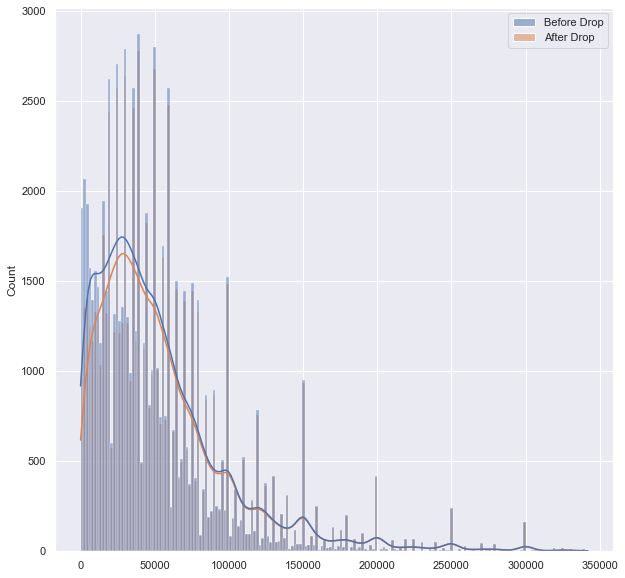

In [37]:
not_dropped = new_data['Salary']
dropped = new_data.drop(index=indices_lst)['Salary']
print('### BEFORE DROPPING ###')
print(not_dropped.describe())
print()
print('### AFTER DROPPING ###')
print(dropped.describe())
drop_comparison = pd.DataFrame() #create temp dataset to compare the distribution of salary before and after dropped
drop_comparison['Before Drop'] = not_dropped
drop_comparison['After Drop'] = dropped

f, axes = plt.subplots(figsize=(10,10))
sb.histplot(data=drop_comparison, kde=True, ax=axes)

Since the number of rows with invalid inputs are relatively small compared to the whole dataset,
we will proceed to drop those rows.

We will also drop the GOV_CERT and CERT_NEED columns

In [38]:
#drop rows with invalid inputs
new_data = new_data.drop(index=indices_lst)

#drop columns
new_data = new_data.drop(columns=['Gov_Cert', 'Cert_Need'])

new_data

,Education,Marital,Sex,Age,Race,Veteran,Pro_Cert,Groom_Dis,Hear_Dis,Vis_Dis,Err_Dis,Climb_Dis,Concen_Dis,Citizenship,HrsWeek,Industry,Occupation,WorkClass,Salary
1,39,1,1,12,1,2,2,2,2,2,2,2,2,1,0,3,6305,4,10000
3,43,1,2,15,1,2,2,2,1,2,2,2,2,1,32,10,2002,5,43000
4,39,1,1,15,1,2,1,2,2,2,2,2,2,1,40,6,9130,4,33000
5,43,7,1,6,1,2,2,2,2,2,2,2,2,1,40,5,9645,4,25000
12,39,7,1,6,1,2,2,2,2,2,2,2,2,1,48,4,8990,4,54700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163530,41,7,1,11,4,2,2,2,2,2,2,2,2,1,40,11,310,6,60000
163534,41,1,1,7,4,2,2,2,2,2,2,2,2,4,55,13,3930,1,64000
163535,39,1,2,7,4,2,2,2,2,2,2,2,2,4,40,11,4220,1,20800
163540,39,1,2,15,4,2,2,2,2,2,2,2,2,4,40,11,4230,4,35000


Therefore, there are 70503 working adults' data for us to work with.

<b>Understanding the number of level in categorical features</b>

From our data dictionary, we understand that our predictor variables (features), except HrsWeek, are categorical. However, we would like to understand how many levels are there for each feature.

In [39]:
col_lst = ['Education', 'Marital', 'Sex', 'Age', 'Race', 'Veteran', 'Pro_Cert', 'Groom_Dis', 'Hear_Dis', 'Vis_Dis', 'Err_Dis', 'Climb_Dis', 'Concen_Dis', 'Citizenship', 'HrsWeek', 'Industry', 'Occupation', 'HrsWeek', 'WorkClass']
for col in col_lst:
    if col != 'HrsWeek': #exclude HrsWeek as it is a numerical variable
        print(col, ':', new_data[col].nunique())

Education : 16
Marital : 7
Sex : 2
Age : 16
Race : 25
Veteran : 2
Pro_Cert : 2
Groom_Dis : 2
Hear_Dis : 2
Vis_Dis : 2
Err_Dis : 2
Climb_Dis : 2
Concen_Dis : 2
Citizenship : 5
Industry : 14
Occupation : 526
WorkClass : 8


We see that Occupation has many levels and we do not have enough support for it. Hence, we will make the assumption that for users who are looking to enter the industry, occupation may vary and it is sufficient to take the salary characteristics of the industry. We will therefore drop Occupation.

In [40]:
new_data = new_data.drop(columns=['Occupation']) #drop Occupation

<b>Encoding</b>

Our response variable is now a numerical variable. As our problem is a classfication problem, we want to encode it into a categorical variable.

We want to avoid class inbalance so we will split the classes by quantiles. We will split the data into 5 classes:
<br>Class 1: top 20%
<br>Class 2: 20-40% percentile (inclusive of 40)
<br>Class 3: 40-60% percentile (inclusive of 60)
<br>Class 4: 60-80% percentile (inclusive of 80)
<br>Class 5: 80-100 percentile (inclusive of 100)

In [41]:
#understanding the value at each class
print('Class 1 lowest salary:', new_data['Salary'].quantile(q=0.80))
print('Class 2 lowest salary:', new_data['Salary'].quantile(q=0.60))
print('Class 3 lowest salary:', new_data['Salary'].quantile(q=0.40))
print('Class 4 lowest salary:', new_data['Salary'].quantile(q=0.20))
print('Class 5 lowest salary:', new_data['Salary'].quantile(q=0))

Class 1 lowest salary: 80000.0
Class 2 lowest salary: 52000.0
Class 3 lowest salary: 35000.0
Class 4 lowest salary: 20000.0
Class 5 lowest salary: 3.0


In [42]:
#encoding salary values into different classes
for index in range(len(new_data['Salary'])):
    temp = new_data['Salary'].iloc[index]
    if temp >= 70000: #class 1
        new_data['Salary'].iloc[index] = 1
    elif temp >= 50000: #class 2
        new_data['Salary'].iloc[index] = 2
    elif temp >= 32000: #class 3
        new_data['Salary'].iloc[index] = 3
    elif temp >= 18200: #class 4
        new_data['Salary'].iloc[index] = 4
    else: #class 5
        new_data['Salary'].iloc[index] = 5

new_data

,Education,Marital,Sex,Age,Race,Veteran,Pro_Cert,Groom_Dis,Hear_Dis,Vis_Dis,Err_Dis,Climb_Dis,Concen_Dis,Citizenship,HrsWeek,Industry,WorkClass,Salary
1,39,1,1,12,1,2,2,2,2,2,2,2,2,1,0,3,4,5
3,43,1,2,15,1,2,2,2,1,2,2,2,2,1,32,10,5,3
4,39,1,1,15,1,2,1,2,2,2,2,2,2,1,40,6,4,3
5,43,7,1,6,1,2,2,2,2,2,2,2,2,1,40,5,4,4
12,39,7,1,6,1,2,2,2,2,2,2,2,2,1,48,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163530,41,7,1,11,4,2,2,2,2,2,2,2,2,1,40,11,6,2
163534,41,1,1,7,4,2,2,2,2,2,2,2,2,4,55,13,1,2
163535,39,1,2,7,4,2,2,2,2,2,2,2,2,4,40,11,1,4
163540,39,1,2,15,4,2,2,2,2,2,2,2,2,4,40,11,4,3


The data dictionary also indicated that the HrsWeek will be 0 if the respondent is in the Armed Forces. We do not want to include Air Force as its detailed salary and allowance are available on the internet. Hence, we will remove those rows.

In [43]:
new_data = new_data[new_data['HrsWeek']>0]
new_data

,Education,Marital,Sex,Age,Race,Veteran,Pro_Cert,Groom_Dis,Hear_Dis,Vis_Dis,Err_Dis,Climb_Dis,Concen_Dis,Citizenship,HrsWeek,Industry,WorkClass,Salary
3,43,1,2,15,1,2,2,2,1,2,2,2,2,1,32,10,5,3
4,39,1,1,15,1,2,1,2,2,2,2,2,2,1,40,6,4,3
5,43,7,1,6,1,2,2,2,2,2,2,2,2,1,40,5,4,4
12,39,7,1,6,1,2,2,2,2,2,2,2,2,1,48,4,4,2
15,41,7,2,10,1,2,1,2,2,2,2,2,2,1,40,10,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163530,41,7,1,11,4,2,2,2,2,2,2,2,2,1,40,11,6,2
163534,41,1,1,7,4,2,2,2,2,2,2,2,2,4,55,13,1,2
163535,39,1,2,7,4,2,2,2,2,2,2,2,2,4,40,11,1,4
163540,39,1,2,15,4,2,2,2,2,2,2,2,2,4,40,11,4,3


Exporting this reduced CSV file for future reference

In [44]:
new_data.to_csv('reduced_dataset.csv', index=False)

<h1>Splitting data into train and test data</h1>

Importing scikitlearn library

In [45]:
from sklearn.model_selection import train_test_split

We will now split the data into train and test datasets with test being 30% of the overall dataset

In [46]:
predictor_var = ['Education', 'Marital', 'Sex', 'Age', 'Race', 'Veteran', 'Pro_Cert', 'Groom_Dis', 'Hear_Dis', 'Vis_Dis', 'Err_Dis', 'Climb_Dis', 'Concen_Dis', 'Citizenship', 'HrsWeek', 'Industry', 'WorkClass']

y = new_data['Salary']
x = new_data[predictor_var]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

We will now export the train and test data into csv files

In [47]:
x_train.to_csv('x_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)